In [1]:
import cv2
import matplotlib.pyplot as plt
from IPython.display import clear_output
import plotly.express as px

In [2]:
import torch
# Model
#model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
# load model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5s.pt')

Using cache found in /home/davide/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-3-8 Python-3.10.12 torch-2.2.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [19]:
def display_cv_image(image):
    clear_output(wait=True)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model(image)
    results.show()
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    #plt.axis('off')
    #plt.show()
    # save the image

In [20]:
def test_webcam_in_notebook():
    # Open the default camera (usually the first webcam)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Unable to open the webcam.")
        return

    try:
        while True:
            # Capture frame-by-frame
            ret, frame = cap.read()
            print(frame.shape)
            display_cv_image(frame)
            break
            # press q to exit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
    finally:
        # Release the camera
        cap.release()

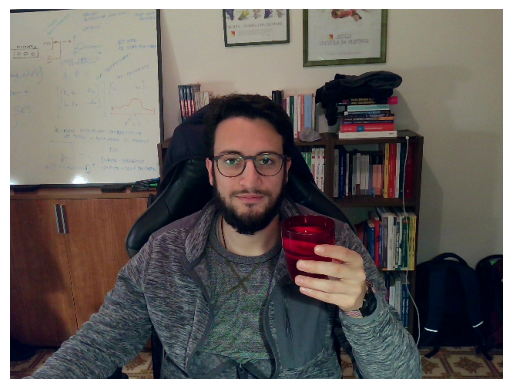

In [21]:
test_webcam_in_notebook()

image 1/1: 480x640 1 person, 1 backpack, 1 cup, 1 chair, 16 books
Speed: 10.0ms pre-process, 181.3ms inference, 3.5ms NMS per image at shape (1, 3, 480, 640)


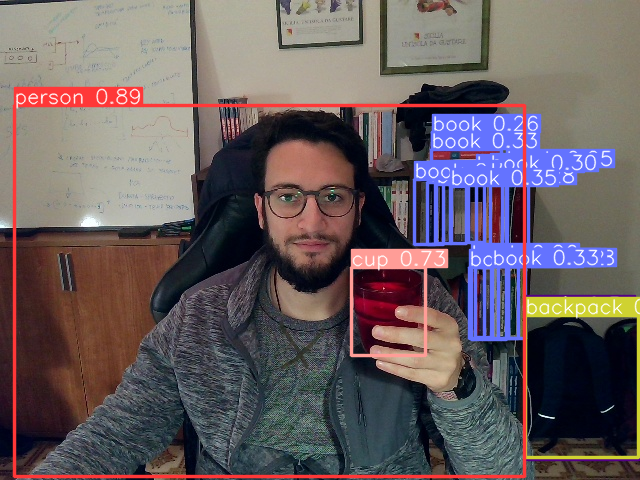

In [9]:
# Images
imgs = ['image.jpg']  # batch of images

# Inference
results = model(imgs)  # includes NMS

# Results
results.print()
results.show()#.save()  # or .show()

In [10]:
#results.xyxy[0]  # img1 predictions (tensor)
df_res = results.pandas().xyxy[0]  # img1 predictions (pandas)
df_res

,xmin,ymin,xmax,ymax,confidence,class,name
0,14.236633,105.859909,524.972900,476.416016,0.891730,0,person
1,351.912872,267.051880,425.148895,355.761780,0.734292,41,cup
2,525.690796,315.750366,638.636597,457.848083,0.375602,24,backpack
3,450.502960,186.822021,466.275177,243.018036,0.349791,73,book
4,431.126221,149.418396,501.195740,161.858643,0.327806,73,book
5,492.640503,266.985992,508.663391,338.816559,0.327156,73,book
6,498.795197,266.966980,518.316040,338.193298,0.319438,73,book
7,469.111786,267.089203,484.186310,338.246307,0.313102,73,book
8,525.827881,313.909546,639.070679,459.245544,0.309111,56,chair
9,490.172333,171.591766,507.554535,247.217743,0.300181,73,book


In [16]:
# Define the image path
image_path = 'image.jpg'
image = cv2.imread(image_path)
for row in range(len(df_res)):
    # Define the bounding box coordinates
    x_min = df_res['xmin'][row].astype(int)
    y_min = df_res['ymin'][row].astype(int)
    x_max = df_res['xmax'][row].astype(int)
    y_max = df_res['ymax'][row].astype(int)

    # Draw the bounding box
    if df_res['name'][row] == 'chair':
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

        # Draw the class name and the confidence
        cv2.putText(image, df_res['name'][row], (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        cv2.putText(image, str(round(df_res['confidence'][row], 2)), (x_min, y_min - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

fig = px.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), title='YOLOv5', width=800, height=600)
# remove the x and y axis labels
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()